<a href="https://colab.research.google.com/github/victoriamaina/Implementing-KNN-and-Naives-Bayes-Classifier/blob/main/Implementing_Naives_Bayes_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **implementing Naives Bayes Classifier.**

By
 Victoria Maina



## **1. Defining the Question**

### a) Specifying the Question

The research problem is to implement Naive Bayes classifier. And futher calculate the resulting metrics



### b) Defining the Metric for Success

 This project will be successful when:
 
  1))The model achieves atleast 80% accuracy


### c) Understanding the context 

> We requires us to implement Naive Bayes classifier. Once we conduct the experiments, and further calculate the resulting metric




### d) Recording the Experimental Design

> The following steps were taken:

Business Understanding

Reading the data

Checking our data

Data cleaning

Performing EDA

Naive Bayes Classifier

Challenging the solution

Conclusion

### e) Data Relevance

Datasets Provided:

spamdata [link text](https://archive.ics.uci.edu/ml/datasets/Spambase)

## **2. Reading the Data**

In [2]:
# Importing the libraries we will need 

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats

from scipy import stats

### Reading the Dataset from our CSV file

In [3]:
#loading the dataset
df=pd.read_csv("/content/spambase.data")
#previewing the dataset
df.head()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [4]:
#checking the tail
df.tail()

,0,0.64,0.64.1,0.1,0.32,0.2,0.3,0.4,0.5,0.6,0.7,0.64.2,0.8,0.9,0.10,0.32.1,0.11,1.29,1.93,0.12,0.96,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32.2,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.40,0.41,0.42,0.778,0.43,0.44,3.756,61,278,1
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


## **3. Data Understanding**

In [5]:
#Renaming of columns
df.columns =['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',
       'char_freq_%3B', 'char_freq_%28', 'char_freq_%5B', 'char_freq_%21',
       'char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total', 'class']

In [6]:
#getting the info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4600 non-null   float64
 1   word_freq_address           4600 non-null   float64
 2   word_freq_all               4600 non-null   float64
 3   word_freq_3d                4600 non-null   float64
 4   word_freq_our               4600 non-null   float64
 5   word_freq_over              4600 non-null   float64
 6   word_freq_remove            4600 non-null   float64
 7   word_freq_internet          4600 non-null   float64
 8   word_freq_order             4600 non-null   float64
 9   word_freq_mail              4600 non-null   float64
 10  word_freq_receive           4600 non-null   float64
 11  word_freq_will              4600 non-null   float64
 12  word_freq_people            4600 non-null   float64
 13  word_freq_report            4600 

Our dataset comprises of Float and integer data types.






In [7]:
#checking the columns
#
df.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


We have 58 columns as shown above.

In [8]:
#Getting the shape
#
df.shape

(4600, 58)



There are 4600 records and 58 variables.

In [9]:
#getting basic statistical details
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,0.104576,0.212922,0.280578,0.065439,0.312222,0.095922,0.114233,0.105317,0.090087,0.239465,0.059837,0.541680,0.093950,0.058639,0.049215,0.248833,0.142617,0.184504,1.662041,0.085596,0.809728,0.121228,0.101667,0.094289,0.549624,0.265441,0.767472,0.124872,0.098937,0.102874,0.064767,0.047059,0.097250,0.047846,0.105435,0.097498,0.136983,0.013204,0.078646,0.064848,0.043676,0.132367,0.046109,0.079213,0.301289,0.179863,0.005446,0.031876,0.038583,0.139061,0.016980,0.268960,0.075827,0.044248,5.191827,52.170870,283.290435,0.393913
std,0.305387,1.290700,0.504170,1.395303,0.672586,0.273850,0.391480,0.401112,0.278643,0.644816,0.201565,0.861791,0.301065,0.335219,0.258871,0.825881,0.444099,0.530930,1.775669,0.509821,1.200938,1.025866,0.350321,0.442681,1.671511,0.887043,3.367639,0.538631,0.593389,0.456729,0.403435,0.328594,0.555966,0.329480,0.532315,0.402664,0.423493,0.220675,0.434718,0.349953,0.361243,0.766900,0.223835,0.622042,1.011787,0.911214,0.076283,0.285765,0.243497,0.270377,0.109406,0.815726,0.245906,0.429388,31.732891,194.912453,606.413764,0.488669
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

The count,mean,std,min,max and quartiles are shown above.

In [10]:
#getting the number unique values in each column
df.nunique()

word_freq_make                 142
word_freq_address              171
word_freq_all                  214
word_freq_3d                    43
word_freq_our                  255
word_freq_over                 141
word_freq_remove               173
word_freq_internet             170
word_freq_order                144
word_freq_mail                 245
word_freq_receive              113
word_freq_will                 316
word_freq_people               158
word_freq_report               133
word_freq_addresses            118
word_freq_free                 253
word_freq_business             197
word_freq_email                229
word_freq_you                  575
word_freq_credit               148
word_freq_your                 401
word_freq_font                  99
word_freq_000                  164
word_freq_money                143
word_freq_hp                   395
word_freq_hpl                  281
word_freq_george               240
word_freq_650                  200
word_freq_lab       

These are the number of unique values in each column.

In [11]:
#checking for missing values
df.isnull().sum().sum()

0

*There* are 0 missing values.

## **4. Data Cleaning**

> This done by following the data integrity rules i.e Validity, Accuracy, Completeness, Consistency, Uniformity to ensure the data is ready for analysis

### 4.1 Completeness

In [12]:
#checking for null values across each column
df.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

the dataset has no null values.

In [13]:
#Checking for the percentage of the missing values
df.isna().mean().round(4) * 100

word_freq_make                0.0
word_freq_address             0.0
word_freq_all                 0.0
word_freq_3d                  0.0
word_freq_our                 0.0
word_freq_over                0.0
word_freq_remove              0.0
word_freq_internet            0.0
word_freq_order               0.0
word_freq_mail                0.0
word_freq_receive             0.0
word_freq_will                0.0
word_freq_people              0.0
word_freq_report              0.0
word_freq_addresses           0.0
word_freq_free                0.0
word_freq_business            0.0
word_freq_email               0.0
word_freq_you                 0.0
word_freq_credit              0.0
word_freq_your                0.0
word_freq_font                0.0
word_freq_000                 0.0
word_freq_money               0.0
word_freq_hp                  0.0
word_freq_hpl                 0.0
word_freq_george              0.0
word_freq_650                 0.0
word_freq_lab                 0.0
word_freq_labs

### 4.2 Validity

In [14]:
# Replacing spaces in the column names with underscore
df.columns= df.columns.str.replace(" ", "_")

To make our columns look neater.

There are existing outliers but they won't be dropped as they are true values to the data,i.e, represent real time data.

### 4.3 Consistency

In [16]:
#checking for duplicates
df.duplicated().sum()

391

There are 391 duplicates.

In [24]:
##Dropping the duplicates
df=df.drop_duplicates(keep=False)

### 4.4 Uniformity

In [26]:
#no action was done

### 4.5 Accuracy

In [27]:
#no action was done

## **5. Exploratory Data Analysis**

### Univariate Analysis

In [30]:
df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.00000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000,4029.000000
mean,0.104289,0.109715,0.292653,0.057111,0.325853,0.094708,0.116828,0.106272,0.091008,0.24765,0.055547,0.571139,0.097741,0.061541,0.040697,0.248707,0.150057,0.186565,1.718307,0.082867,0.797362,0.136587,0.097081,0.086503,0.581497,0.285423,0.316897,0.130859,0.097372,0.104155,0.063924,0.044867,0.102827,0.045766,0.109851,0.101181,0.145331,0.014651,0.085875,0.059911,0.040266,0.144674,0.049675,0.087759,0.327528,0.194105,0.005885,0.036220,0.040711,0.144680,0.017031,0.282982,0.073483,0.045318,5.447304,51.165053,289.945644,0.390171
std,0.301097,0.403192,0.520979,1.264969,0.691723,0.274668,0.396870,0.411373,0.281877,0.65774,0.182561,0.893963,0.311799,0.350571,0.226612,0.745370,0.462847,0.542401,1.760740,0.498896,1.131014,1.094298,0.348276,0.423232,1.667233,0.915975,1.388425,0.538520,0.561545,0.433256,0.387175,0.296517,0.569705,0.297645,0.534950,0.386146,0.421831,0.235530,0.451653,0.312655,0.296103,0.803929,0.235218,0.656458,1.060772,0.937340,0.080357,0.305044,0.256349,0.275778,0.098641,0.854939,0.227074,0.432129,33.872948,201.674324,623.187963,0.487849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.629000,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.190000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.360000,0.000000,0.280000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000

above is the mean ,count ,minimum ,maximumand quantile of the above columns

#### Histograms

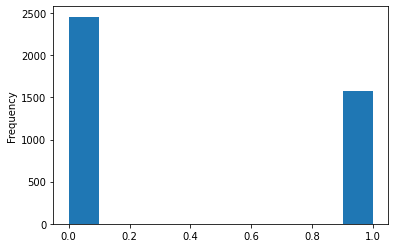

In [56]:
df['class'].plot.hist()

The above bar graph most emails were valid and those with(1) were spams.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


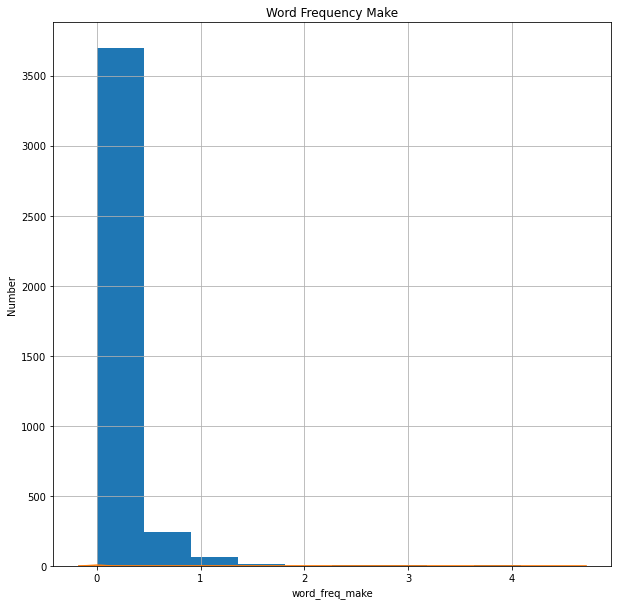

In [58]:
#plotting the histogram for the pclass column
#
plt.figure(figsize = (10,10))
df['word_freq_make'].hist()
sns.distplot(df['word_freq_make'])
plt.title('Word Frequency Make')
plt.xlabel('word_freq_make')
plt.ylabel('Number')
plt.show()

the dataset shows most emails had word frequency make


### Bivariate Analysis

#### Heat Map

In [28]:
#this is a summary analysis of the correlation coefficients in the datasets

corr = df.corr()

corr.style.background_gradient(cmap='coolwarm')

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.041750,0.058147,-0.004984,0.019190,0.050709,0.013286,-0.004025,0.097590,0.038685,0.046394,0.070333,0.057588,0.028552,0.017859,0.069786,0.078384,0.048976,0.118780,0.019580,0.114222,-0.025746,0.118341,0.209071,-0.075090,-0.063389,-0.046726,-0.050389,-0.041369,-0.054024,-0.038497,-0.031271,-0.042582,-0.025662,-0.046271,-0.057835,-0.058205,-0.008931,-0.010796,-0.034757,-0.002327,-0.025853,-0.025907,-0.022859,-0.037570,-0.034111,-0.000617,-0.019304,-0.026807,-0.018457,-0.035304,0.057505,0.080454,-0.008763,0.044932,0.056200,0.078679,0.126046
word_freq_address,0.041750,1.000000,0.034288,-0.008988,0.047122,0.008062,0.091343,0.019614,0.052890,0.214517,0.074340,0.033901,0.019947,0.014815,0.075321,0.061941,0.029973,0.206619,0.073176,-0.005373,0.147975,0.002543,0.011187,0.075994,-0.060252,-0.050172,-0.005173,-0.037019,-0.029427,-0.033079,-0.018619,0.033912,-0.035005,0.030570,-0.029009,-0.032484,0.005965,-0.014192,-0.018687,0.003409,-0.024480,-0.041188,0.041775,-0.032294,0.024954,-0.029922,-0.013267,-0.023188,0.017520,-0.028977,-0.021909,0.037047,0.055172,0.037540,0.033051,0.061172,0.040518,0.123841
word_freq_all,0.058147,0.034288,1.000000,-0.018218,0.064140,0.057986,0.028931,0.007633,0.071814,0.025047,0.054411,0.059394,0.033017,0.004906,0.098380,0.066504,0.028635,0.109049,0.127387,0.032477,0.141916,-0.040618,0.098403,0.025580,-0.091553,-0.065819,-0.080009,-0.049857,-0.056445,-0.027163,-0.034675,-0.063144,-0.057189,-0.062977,-0.047925,-0.046569,-0.075302,0.031932,-0.016294,-0.044800,-0.030297,-0.005945,-0.054368,-0.057279,-0.056669,-0.061033,0.026535,-0.030175,-0.036923,-0.024188,-0.034822,0.092439,0.065098,-0.003410,0.095706,0.087102,0.046525,0.164599
word_freq_3d,-0.004984,-0.008988,-0.018218,1.000000,-0.002313,-0.007519,0.007943,-0.003560,0.001241,-0.001607,-0.012425,-0.016389,-0.012410,-0.006615,0.008611,0.004196,-0.009690,0.013622,-0.006647,-0.004293,-0.000020,0.034086,0.019055,0.012359,-0.015448,-0.013674,-0.010296,-0.010338,-0.007801,-0.010740,-0.007456,-0.006833,-0.007993,-0.006830,-0.005304,-0.005476,-0.006191,-0.002647,-0.003880,-0.007177,-0.006141,-0.008127,-0.009066,-0.005990,-0.012732,-0.009258,-0.003307,-0.001460,0.001011,-0.009183,-0.007615,-0.004016,0.005275,0.000939,0.006627,0.022213,0.027409,0.055457
word_freq_our,0.019190,0.047122,0.064140,-0.002313,1.000000,0.037326,0.133030,0.022393,0.015773,0.025882,0.079312,0.051366,0.016260,0.002562,0.046081,0.082542,0.136749,0.046875,0.079968,0.027885,0.146661,-0.022879,0.059523,0.001807,-0.075559,-0.079232,-0.059635,-0.063552,0.046704,-0.052281,-0.040879,-0.022398,-0.033921,-0.022721,-0.050326,-0.052670,-0.076866,0.135563,-0.045264,-0.015210,-0.055044,0.102586,-0.055196,-0.007856,-0.051126,-0.084978,-0.027924,-0.035803,-0.034509,-0.053904,-0.026749,0.018973,0.046073,0.004404,0.051136,0.040833,-0.013441,0.228754
word_freq_over,0.050709,0.008062,0.057986,-0.007519,0.037326,1.000000,0.039746,0.081323,0.087548,0.010684,0.052879,0.000837,0.063841,0.008664,0.119536,0.016673,0.053549,0.050724,0.079305,0.057217,0.101293,0.006865,0.164241,0.058507,-0.085

In [32]:
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.80)]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


In [33]:
df.shape

(4029, 58)

### Multivariate Analysis

#### Linear Discriminant Analysis (LDA)

In [34]:
# Divide the dataset into features and corresponding labels.
X1= df.drop(["class"],1)
y =df["class"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [35]:
#checking for unique values of the target variable
y.unique()

array([1, 0])

In [36]:
#import Linear Discriminant Analysismethod from sklearn library
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [37]:
#create an instance of LDA and train the model
lda= LDA()

lda_= lda.fit(X1, y)
lda_feat = lda_. transform(X1)

#displaying the coefficients of the reducted columns
lda.coef_

array([[-1.90916083e-02,  1.46142890e-01,  2.82543649e-01,
         1.43804458e-01,  7.38150904e-01,  1.07388656e+00,
         2.01961998e+00,  7.94377925e-01,  6.18075343e-01,
         3.96572022e-02,  1.40913359e+00, -2.63994905e-01,
        -3.14490565e-02,  3.45290194e-02,  2.76003929e-01,
         9.43111625e-01,  4.72781872e-01,  3.97341720e-01,
         1.28301091e-01,  5.59624720e-01,  5.08207728e-01,
         4.46609345e-01,  1.52220569e+00,  6.01264853e-01,
        -2.17294496e-01, -1.71272145e-01, -1.97596400e-01,
         1.10755410e-01, -9.80849866e-02, -4.88239062e-01,
        -1.85132805e-01, -4.21746302e-02, -3.62847674e-01,
         2.17925415e-01, -3.05298218e-01,  2.25902268e-01,
        -5.21173062e-01, -5.51488709e-01, -1.61651766e-01,
         6.99768075e-01, -1.84336463e-01, -3.12381415e-01,
        -4.56616329e-01, -2.78736289e-01, -3.00900115e-01,
        -3.36612442e-01, -1.74726781e+00, -4.94609217e-01,
        -1.44586204e+00, -7.28583756e-01, -4.71810259e-0

In [38]:
#coeeficients are in array thus we need a new dataframe to get the column names
feature_importance = pd.DataFrame(index=X1.columns.values, data=lda_.coef_[0].T)
feature_importance.sort_values(0, ascending= False)

,0
char_freq_%24,2.755121
word_freq_remove,2.019620
word_freq_000,1.522206
word_freq_receive,1.409134
word_freq_over,1.073887
word_freq_free,0.943112
word_freq_internet,0.794378
word_freq_our,0.738151
word_freq_direct,0.699768
word_freq_order,0.618075




```
# This is formatted as code
```

**NAIVES BAYES CLASSIFIER**

In [40]:
# Load libraries and datasets to be used in this example
#
from sklearn import datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [51]:
X = df[['word_freq_make', 'word_freq_address', 'word_freq_all',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_order', 'word_freq_mail','word_freq_our',
       'word_freq_receive','word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you','word_freq_all',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money','word_freq_650','word_freq_data', 'word_freq_415',
       'word_freq_technology', 'word_freq_direct','word_freq_internet',
       'char_freq_%21','char_freq_%24', 'char_freq_%23', 'capital_run_length_average',
       'capital_run_length_longest', 'capital_run_length_total']]
y = df['class']   

In [52]:
# Splitting our data into a training set and a test set
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6) 

In [53]:
# Training our model
# 
clf = GaussianNB()  
model = clf.fit(X_train, y_train) 

In [54]:
# Predicting our test predictors
predicted = model.predict(X_test)
print(np.mean(predicted == y_test))

0.8428453267162944


We have an accuracy 84% which is a success.